## Analysis - Salary / Performance by Age + Position

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings("ignore")

### Salaries, Performance by Position, Age

We want to observe how salaries and performance changes over age, separated by position

In [2]:
# Import detailed salaries table we spooled from an SQL query

salaries_detail = pd.read_csv('spool_salaries_detail.csv')
salaries_detail.head()

,PLAYER,SALARY,SEASON,SALARY_PROPORTION,SALARY_SCALE,AGE,POS,WS,PER
0,A.C. Green,1750000,1993.0,0.004382,43.818227,29.0,PF,8.6,16.3
1,A.C. Green,4851000,1997.0,0.006425,64.245257,33.0,PF,4.8,12.4
2,A.C. Green,5125088,1999.0,0.005796,57.957728,35.0,PF,1.4,12.5
3,A.C. Green,1885000,1994.0,0.003767,37.674806,30.0,PF,9.3,17.0
4,A.C. Green,6472600,1995.0,0.014297,142.968646,31.0,SF,6.7,14.2


In [3]:
# Replace positional designations with something more modern (Guard, Wing, Big)

salaries_detail = salaries_detail[salaries_detail['POS'].notnull()]
salaries_detail['POS'] = salaries_detail['POS'].astype(str)     # Convert to str
salaries_detail['POS'] = salaries_detail['POS'].map(lambda s: s[:2]) # Take primary position listing

# Replace positions
def replace_position(s):
    mod_pos = {'PG':'guard', 'SG':'wing', 'SF':'wing', 'PF':'big', 'C':'big', 'C ':'big', 'C-':'big'}
    replaced = mod_pos[s]
    return replaced
  
salaries_detail['POS'] = salaries_detail['POS'].map(replace_position)

salaries_detail['POS'].value_counts()

wing     4625
big      3446
guard    2507
Name: POS, dtype: int64

In [4]:
# We can filter some outliers out

salaries_detail = salaries_detail[salaries_detail['AGE'] > 17]
salaries_detail = salaries_detail[salaries_detail['AGE'] < 39]
salaries_detail.head()

,PLAYER,SALARY,SEASON,SALARY_PROPORTION,SALARY_SCALE,AGE,POS,WS,PER
0,A.C. Green,1750000,1993.0,0.004382,43.818227,29.0,big,8.6,16.3
1,A.C. Green,4851000,1997.0,0.006425,64.245257,33.0,big,4.8,12.4
2,A.C. Green,5125088,1999.0,0.005796,57.957728,35.0,big,1.4,12.5
3,A.C. Green,1885000,1994.0,0.003767,37.674806,30.0,big,9.3,17.0
4,A.C. Green,6472600,1995.0,0.014297,142.968646,31.0,wing,6.7,14.2


### Summary Statistics and Plots

We want to investigate a few different areas:
1. How does salary change as players age at each position? Both mean and median.
2. What is the distribution of players in the league by age at each position?
3. How does player performance change as players age at each position?

With all this combined, we hope to have an idea of how to advise clients on lengths of contracts to seek.

In [5]:
# Summary statistics for Average Salary by Position by Age

salaries_detail.drop(labels=['PLAYER','SALARY','SEASON','SALARY_PROPORTION','WS', 'PER'],
                        axis=1).groupby(['POS', 'AGE']).mean().unstack(level=0)

SALARY_SCALE                      
POS           big      guard       wing
AGE                                    
18.0    13.850517  24.489145  18.659463
19.0    12.711377  13.559875  13.634339
20.0    15.524354  12.144508  10.311687
21.0    15.795791  13.300669  11.976325
22.0    15.153974  10.301512  10.934075
23.0    17.474595   9.716528  11.745028
24.0    20.292666  11.488836  17.028115
25.0    24.514812  19.855913  20.128039
26.0    31.270681  21.507146  24.576858
27.0    36.559098  24.795598  29.148469
28.0    38.093889  27.440011  29.039541
29.0    41.028106  28.819471  30.968893
30.0    37.428872  29.300899  30.921058
31.0    42.098161  26.758729  33.102224
32.0    42.197779  25.236930  33.827677
33.0    39.721253  21.792573  38.482636
34.0    38.049537  27.968477  36.230521
35.0    36.106737  21.603548  30.008086
36.0    33.679145  19.046684  23.765782
37.0    40.078514  17.332253  24.628036
38.0    35.122785  27.079462  10.802824

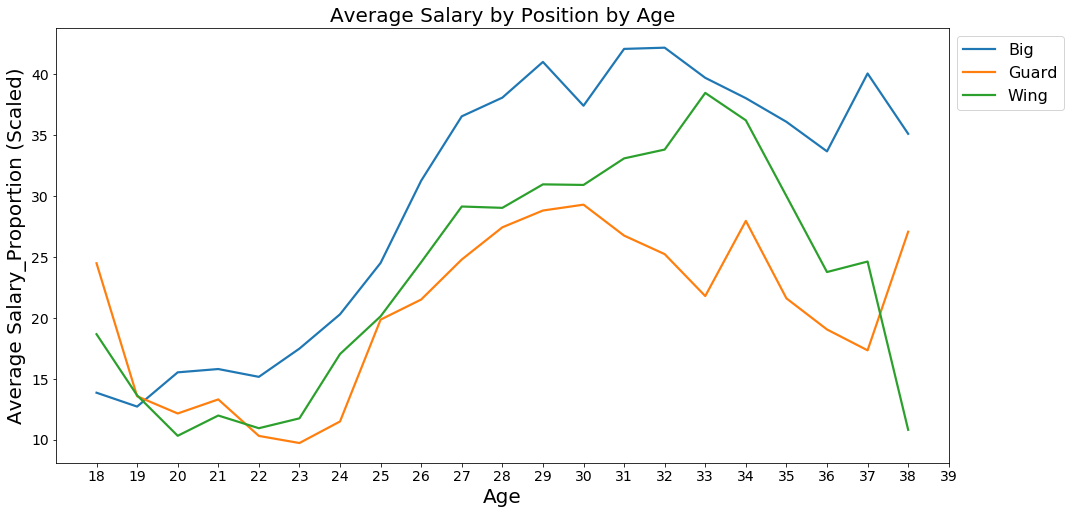

In [6]:
# Plot Average Salary by Position by Age

pos_age_sal = salaries_detail.drop(labels=['PLAYER','SALARY','SEASON','SALARY_PROPORTION','WS', 'PER'],
                        axis=1).groupby(['POS', 'AGE']).mean().unstack(level=0).plot(xticks = range(18, 40),figsize=(16,8), fontsize=14, lw=2.2)
pos_age_sal.set_ylabel('Average Salary_Proportion (Scaled)', fontsize=20)
pos_age_sal.set_xlabel('Age', fontsize=20)
pos_age_sal.set_title('Average Salary by Position by Age', fontsize=20)
pos_age_sal.legend(['Big','Guard','Wing'], fontsize=16, bbox_to_anchor=(1, 1))
pos_age_sal

1. Big men tend to earn more throughout their careers - and especially later in their careers.
2. Wings and Guards generally track throughout early to late 20s. However, Wings achieve separation around Age 30 (even without the Michael Jordan effect)

In [7]:
# Summary statistics of number of players by position by age

salaries_detail.drop(labels=['PLAYER','SALARY','SEASON','SALARY_PROPORTION','WS', 'PER'],
                        axis=1).groupby(['POS', 'AGE']).count().unstack(level=0)

SALARY_SCALE           
POS           big guard wing
AGE                         
18.0            5     4    5
19.0           26    14   37
20.0           69    46  104
21.0          125    91  153
22.0          231   173  382
23.0          309   251  468
24.0          335   276  461
25.0          306   214  441
26.0          290   222  410
27.0          275   192  377
28.0          254   198  335
29.0          239   149  282
30.0          224   146  273
31.0          190   136  247
32.0          157   113  195
33.0          138   100  136
34.0           87    68  121
35.0           70    37   71
36.0           46    25   59
37.0           33    22   35
38.0           22    16   21

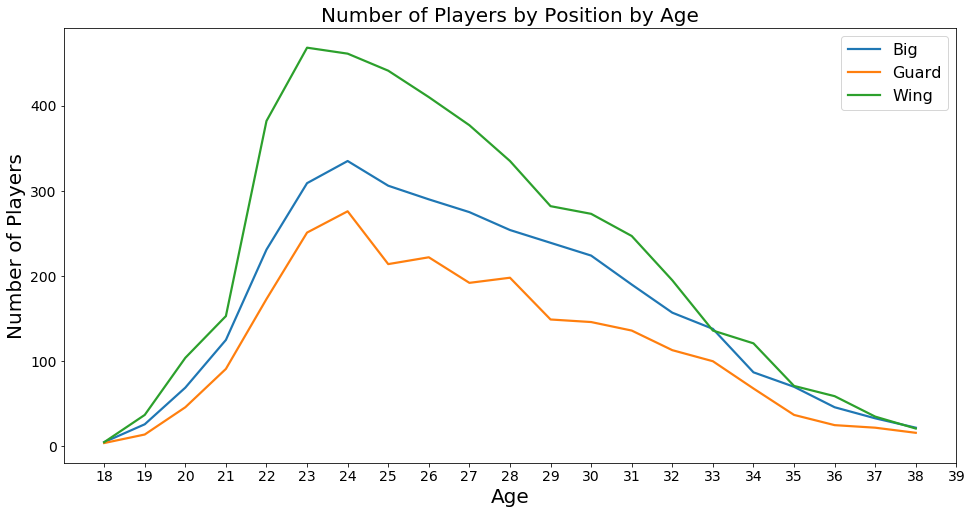

In [8]:
# Plot number of players by position by age

pos_age_sal_3 = salaries_detail.drop(labels=['PLAYER','SALARY','SEASON','SALARY_PROPORTION','WS', 'PER'],
                        axis=1).groupby(['POS', 'AGE']).count().unstack(level=0).plot(xticks = range(18,40),figsize=(16,8), fontsize=14, lw=2.2)
pos_age_sal_3.set_ylabel('Number of Players', fontsize=20)
pos_age_sal_3.set_xlabel('Age', fontsize=20)
pos_age_sal_3.set_title('Number of Players by Position by Age', fontsize=20)
pos_age_sal_3.legend(['Big','Guard','Wing'], fontsize=16, bbox_to_anchor=(1, 1))
pos_age_sal_3

1. We observe a heavy left skew because of players being drafted. After age 24 or so, there is a relatively linear pattern of decreasing players as they age.
2. Since wings are most versatile players (and arguably - difference making), makes sense that there would be more of them. However, the gap closes as they age. I believe this shows an increased element of risk-taking in search of difference-making wings earlier in their career.

In [9]:
# Average win_shares by position by age

salaries_detail.drop(labels=['PLAYER','SALARY','SEASON','SALARY_PROPORTION','SALARY_SCALE', 'PER'],
                        axis=1).groupby(['POS', 'AGE']).mean().unstack(level=0)

WS                    
POS        big     guard      wing
AGE                               
18.0  0.440000  0.025000  1.280000
19.0  1.765385  0.778571  1.459459
20.0  2.740580  1.521739  1.667308
21.0  3.256000  1.791209  2.081046
22.0  2.776623  1.776879  1.683770
23.0  2.640453  1.650996  1.971795
24.0  2.845672  1.765217  2.366377
25.0  3.225163  2.708411  2.512925
26.0  3.394828  2.729730  2.706341
27.0  3.595273  3.160417  3.016976
28.0  3.586614  2.964646  2.970448
29.0  3.659414  3.002013  2.966667
30.0  3.034375  2.942466  2.710989
31.0  3.194211  2.194118  2.794737
32.0  3.060510  2.327434  2.801538
33.0  2.842029  1.660000  2.786765
34.0  2.972414  2.169118  2.406612
35.0  3.152857  2.418919  2.498592
36.0  2.760870  2.704000  1.876271
37.0  2.384848  1.500000  2.120000
38.0  2.245455  1.993750  1.628571

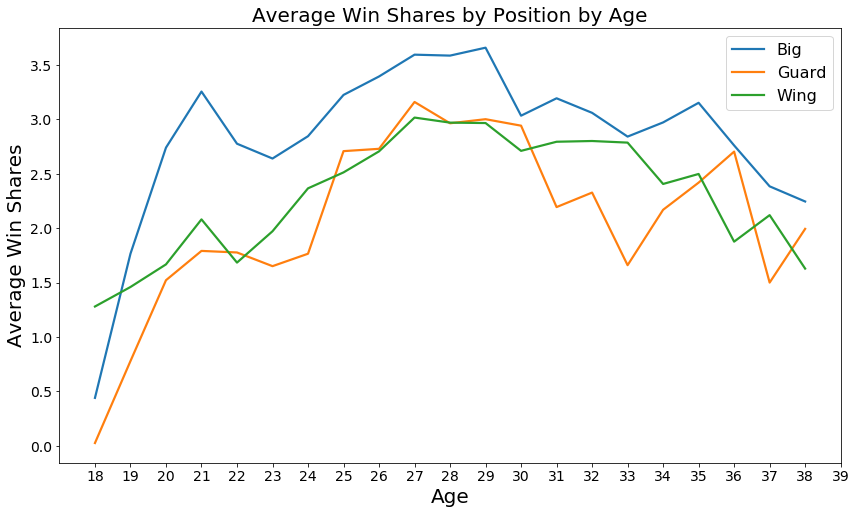

In [10]:
# Plot average win_shares by position by age

pos_age_sal_4 = salaries_detail.drop(labels=['PLAYER','SALARY','SEASON','SALARY_PROPORTION','SALARY_SCALE', 'PER'],
                        axis=1).groupby(['POS', 'AGE']).mean().unstack(level=0).plot(xticks = range(18,40),figsize=(14,8), fontsize=14, lw=2.2)
pos_age_sal_4.set_ylabel('Average Win Shares', fontsize=20)
pos_age_sal_4.set_xlabel('Age', fontsize=20)
pos_age_sal_4.set_title('Average Win Shares by Position by Age', fontsize=20)
pos_age_sal_4.legend(['Big','Guard','Wing'], fontsize=16, bbox_to_anchor=(1, 1))
pos_age_sal_4

Overall, this tracks with the salary plot.

1. Big men tend to achieve higher win shares throughout their careers. 
2. Again, wings and guards track pretty well until late 20s. Around age 30, guard performance drops off (until those elite exceptions who can last into their late 30s skew the results back higher).

In [11]:
# Average PER by position by age

salaries_detail.drop(labels=['PLAYER','SALARY','SEASON','SALARY_PROPORTION','SALARY_SCALE', 'WS'],
                        axis=1).groupby(['POS', 'AGE']).mean().unstack(level=0)

PER                      
POS         big      guard       wing
AGE                                  
18.0  12.220000   9.800000  13.640000
19.0  12.823077  11.571429  11.248649
20.0  14.244928  11.410870  11.922115
21.0  15.236000  12.559341  12.232026
22.0  14.397835  12.263584  11.364921
23.0  13.913592  12.021116  11.737393
24.0  13.824179  12.467029  12.175271
25.0  14.884967  13.781776  12.745125
26.0  14.627931  13.401351  13.070732
27.0  14.889818  14.181771  13.442706
28.0  14.225197  13.861111  12.982687
29.0  14.022594  14.442282  12.888298
30.0  13.280804  13.487671  12.597436
31.0  13.198421  12.363971  12.651012
32.0  13.989809  12.566372  12.071282
33.0  12.788406  11.131000  12.978676
34.0  13.078161  11.773529  11.920661
35.0  14.518571  12.237838  11.669014
36.0  13.089130  12.964000  11.805085
37.0  12.693939  11.818182  12.488571
38.0  14.009091  12.781250  10.814286

# Jimmy Butler Use Case

Jimmy Butler is a 29 year old wing for the Philadelphia 76ers in the final year of his contract. He has a couple options when considering his new contract:
1. Sign a 5 year deal - He could only do this with the Philadelphia 76ers, likely for the max
2. Sign a 4 year max deal with any team
3. Sign a shorter term max deal (1-2 years) then re-sign a longer deal in a couple years

It's basically an @Risk problem (shoutout Professor James Dyer). How can he optimize his earnings?
- His ideal choice would be a 5 year max contract.
- However, if the Sixers don't offer that, could he earn more money by signing a shorter term max deal, then re-signing for another max deal in a couple years?

Essentially, we want to identify when his performance is likely to begin breaking down, and we want to sign a multi-year max contract before that date.

<img src="https://imgur.com/Hol7zey.png">

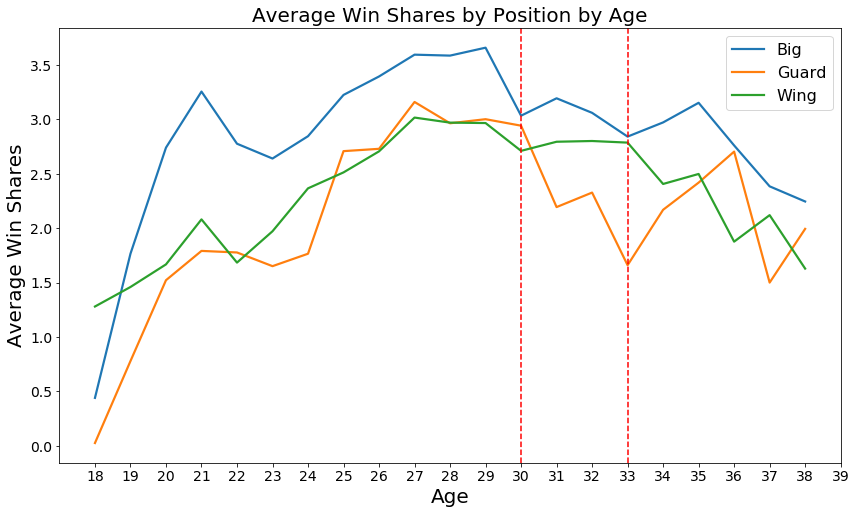

In [12]:
# Observe overall trend of win_shares by age - How can Jimmy expect to age?

pos_age_sal_4 = salaries_detail.drop(labels=['PLAYER','SALARY','SEASON','SALARY_PROPORTION','SALARY_SCALE', 'PER'],
                        axis=1).groupby(['POS', 'AGE']).mean().unstack(level=0).plot(xticks = range(18,40),figsize=(14,8), fontsize=14, lw=2.2)
pos_age_sal_4.set_ylabel('Average Win Shares', fontsize=20)
pos_age_sal_4.set_xlabel('Age', fontsize=20)
pos_age_sal_4.set_title('Average Win Shares by Position by Age', fontsize=20)
pos_age_sal_4.legend(['Big','Guard','Wing'], fontsize=16, bbox_to_anchor=(1, 1))
pos_age_sal_4.axvline(x=30, c='r', linestyle='--')
pos_age_sal_4.axvline(x=33, c='r', linestyle='--')
pos_age_sal_4

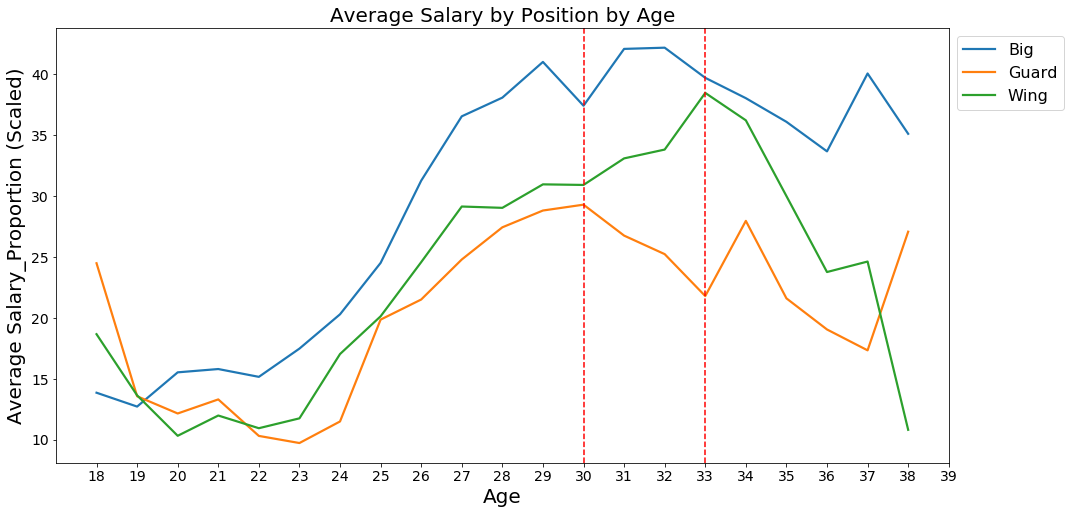

In [13]:
# Observe overall trend of salary by age - What can Jimmy expect?

pos_age_sal = salaries_detail.drop(labels=['PLAYER','SALARY','SEASON','SALARY_PROPORTION','WS', 'PER'],
                        axis=1).groupby(['POS', 'AGE']).mean().unstack(level=0).plot(xticks = range(18, 40),figsize=(16,8), fontsize=14, lw=2.2)
pos_age_sal.set_ylabel('Average Salary_Proportion (Scaled)', fontsize=20)
pos_age_sal.set_xlabel('Age', fontsize=20)
pos_age_sal.set_title('Average Salary by Position by Age', fontsize=20)
pos_age_sal.legend(['Big','Guard','Wing'], fontsize=16, bbox_to_anchor=(1, 1))
pos_age_sal.axvline(x=30, c='r', linestyle='--')
pos_age_sal.axvline(x=33, c='r', linestyle='--')
pos_age_sal

In [14]:
# How does mean and spread of Wing salary and performance change as they age?

# We'll create and populate a dataframe for salary and performance statistics of wings ages 30-36

ageing_wings = pd.DataFrame(columns=['Age','Count','Sal-Mean','Sal-SD','WS-Mean','WS-SD'], index = [0,1,2,3,4,5,6])

age_list = [30, 31, 32, 33, 34, 35, 36]
i = 0

wings = salaries_detail[salaries_detail['POS'] == 'wing']

for age in age_list:
    loop_df = wings[wings['AGE'] == age]
    ageing_wings['Age'][i] = age
    ageing_wings['Count'][i] = len(loop_df)
    ageing_wings['Sal-Mean'][i] = round(loop_df['SALARY_SCALE'].mean(),2)
    ageing_wings['Sal-SD'][i] = round(loop_df['SALARY_SCALE'].std(),2)
    ageing_wings['WS-Mean'][i] = round(loop_df['WS'].mean(),2)
    ageing_wings['WS-SD'][i] = round(loop_df['WS'].std(),2)
    i += 1
    
ageing_wings

,Age,Count,Sal-Mean,Sal-SD,WS-Mean,WS-SD
0,30,273,30.92,24.46,2.71,2.76
1,31,247,33.1,26.54,2.79,2.68
2,32,195,33.83,27.56,2.8,3.06
3,33,136,38.48,43.18,2.79,2.99
4,34,121,36.23,45.66,2.41,2.6
5,35,71,30.01,37.29,2.5,2.3
6,36,59,23.77,25.02,1.88,1.8


In [15]:
# If Butler settles for a 4 year deal, he'd re-sign after his age 33 season

butler_df = salaries_detail[salaries_detail['AGE'] == 33]
butler_df = butler_df[butler_df['POS'] == 'wing']

butler_df.sort_values(by=['WS'], ascending=False)

# We observe mostly shooters and elite athletes

,PLAYER,SALARY,SEASON,SALARY_PROPORTION,SALARY_SCALE,AGE,POS,WS,PER
7119,Michael Jordan,30140000,1997.0,0.039917,399.165540,33.0,wing,18.3,27.8
7765,Paul Pierce,13876321,2011.0,0.007877,78.770013,33.0,wing,11.6,19.7
8092,Ray Allen,18388430,2009.0,0.009392,93.917598,33.0,wing,11.1,17.3
4799,Jeff Hornacek,2396000,1997.0,0.003173,31.731939,33.0,wing,10.2,18.8
6583,Manu Ginobili,11854584,2011.0,0.006729,67.293466,33.0,wing,9.9,21.7
6748,Mario Elie,1400000,1997.0,0.001854,18.541200,33.0,wing,8.9,14.3
5047,Joe Dumars,3075000,1997.0,0.004072,40.724421,33.0,wing,8.8,15.6
3034,Dominique Wilkins,3500000,1994.0,0.006995,69.953220,33.0,wing,8.4,21.4
2908,Detlef Schrempf,3333000,1997.0,0.004414,44.141299,33.0,wing,8.0,18.3
3361,Eddie Jones,13455000,2005.0,0.008415,84.153633,33.0,wing,8.0,13.6


In [16]:
# Michael Jordan is ruining my analysis

jordan_df = salaries_detail[salaries_detail['PLAYER'] == 'Michael Jordan']
jordan_df = jordan_df[jordan_df['AGE'] > 31]
jordan_df.sort_values(by=['AGE'])

,PLAYER,SALARY,SEASON,SALARY_PROPORTION,SALARY_SCALE,AGE,POS,WS,PER
7122,Michael Jordan,3850000,1996.0,0.005928,59.284308,32.0,wing,20.4,29.4
7119,Michael Jordan,30140000,1997.0,0.039917,399.165540,33.0,wing,18.3,27.8
7118,Michael Jordan,33140000,1998.0,0.040734,407.342744,34.0,wing,15.8,25.2
7116,Michael Jordan,1000000,2002.0,0.000642,6.416003,38.0,wing,3.3,20.7


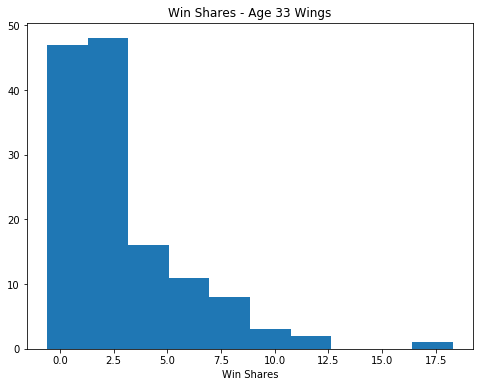

In [17]:
# Plot distribution of Win Shares for Age 33 Wings

plt.figure(figsize=(8,6))
plt.hist(butler_df['WS'])
plt.xlabel('Win Shares')
plt.title('Win Shares - Age 33 Wings')
plt.show()

We see average win shares stay relatively constant in ages 32 and 33. What if he signs a three-year deal instead and re-ups after? Could he expect elite performance in an age 32 season that would lead to a much better contract?

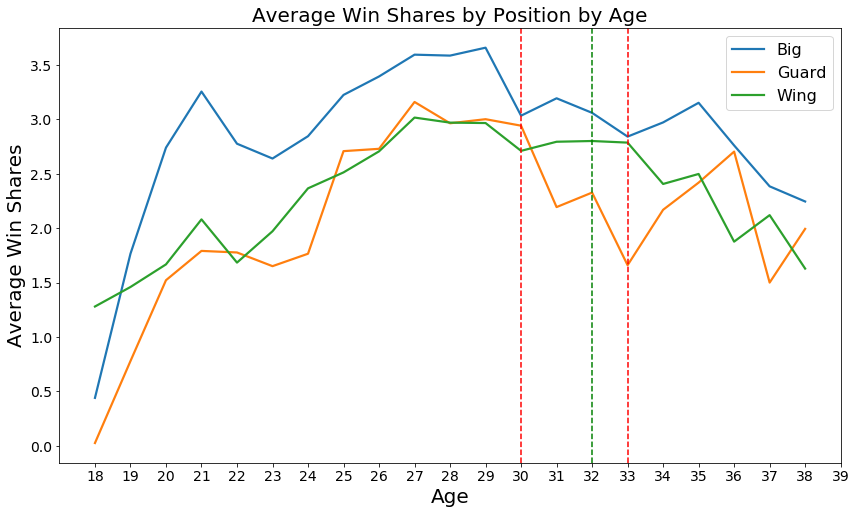

In [18]:
# Observe overall trend of win_shares by age - How can Jimmy expect to age?

pos_age_sal_4 = salaries_detail.drop(labels=['PLAYER','SALARY','SEASON','SALARY_PROPORTION','SALARY_SCALE', 'PER'],
                        axis=1).groupby(['POS', 'AGE']).mean().unstack(level=0).plot(xticks = range(18,40),figsize=(14,8), fontsize=14, lw=2.2)
pos_age_sal_4.set_ylabel('Average Win Shares', fontsize=20)
pos_age_sal_4.set_xlabel('Age', fontsize=20)
pos_age_sal_4.set_title('Average Win Shares by Position by Age', fontsize=20)
pos_age_sal_4.legend(['Big','Guard','Wing'], fontsize=16, bbox_to_anchor=(1, 1))
pos_age_sal_4.axvline(x=30, c='r', linestyle='--')
pos_age_sal_4.axvline(x=32, c='g', linestyle='--')
pos_age_sal_4.axvline(x=33, c='r', linestyle='--')
pos_age_sal_4

In [19]:
# If Butler signs a 3 year deal, he'd re-sign after his age 32 season

butler_df_32 = salaries_detail[salaries_detail['AGE'] == 32]
butler_df_32 = butler_df_32[butler_df_32['POS'] == 'wing']

butler_df_32.sort_values(by=['WS'], ascending=False)

# There's a greater mix of player types

,PLAYER,SALARY,SEASON,SALARY_PROPORTION,SALARY_SCALE,AGE,POS,WS,PER
7122,Michael Jordan,3850000,1996.0,0.005928,59.284308,32.0,wing,20.4,29.4
6279,LeBron James,30963450,2017.0,0.010470,104.695180,32.0,wing,12.9,27.0
2050,Clyde Drexler,1578000,1995.0,0.003486,34.855317,32.0,wing,11.7,22.4
246,Allen Iverson,19012500,2008.0,0.011001,110.007150,32.0,wing,11.6,20.9
3030,Dominique Wilkins,3500000,1993.0,0.008764,87.636454,32.0,wing,10.5,24.3
5974,Kobe Bryant,24806250,2011.0,0.014081,140.814603,32.0,wing,10.3,23.9
4798,Jeff Hornacek,2121000,1996.0,0.003266,32.660264,32.0,wing,10.2,19.1
6582,Manu Ginobili,10728130,2010.0,0.005248,52.483081,32.0,wing,9.7,22.5
3372,Eddie Jones,12333750,2004.0,0.008254,82.535669,32.0,wing,9.1,16.7
3133,Doug Christie,6250000,2003.0,0.004020,40.197370,32.0,wing,8.9,15.0


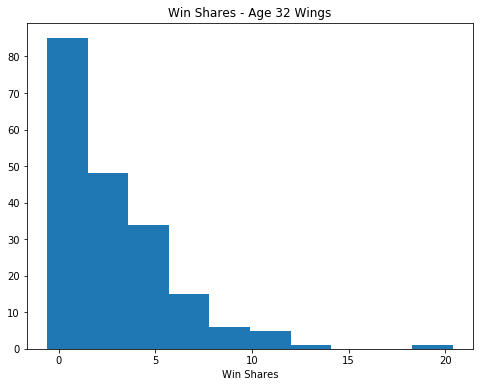

In [20]:
# Plot distribution of Win Shares for Age 31 Wings

plt.figure(figsize=(8,6))
plt.hist(butler_df_32['WS'])
plt.xlabel('Win Shares')
plt.title('Win Shares - Age 32 Wings')
plt.show()

#### RESULT AND INSIGHT

From age 34 and onward, performance tends to drop at a faster rate.

As a form of risk aversion, we might advise Butler to sign for as long as he's able. It still will be more likely that he could out-earn his performance if he were to experience a drop off.

However, there could be an advantage to taking a 2 or 3 year deal (perhaps with an extra year player option) at a max level and then either trying to obtain another lower salary long-term deal or a pattern of 1 year deals at an extremely high salary (similar to JJ Redick).